In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,LeakyReLU

In [ ]:
data=[]
labels=[]
Parasitized=os.listdir("/content/drive/My Drive/Colab Notebooks/Dataset/cell_images/Parasitized/")
for a in Parasitized:
    try:
        image=cv2.imread("/content/drive/My Drive/Colab Notebooks/Dataset/cell_images/Parasitized/"+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((64, 64))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

Uninfected=os.listdir("/content/drive/My Drive/Colab Notebooks/Dataset/cell_images/Uninfected/")
for b in Uninfected:
    try:
        image=cv2.imread("/content/drive/My Drive/Colab Notebooks/Dataset/cell_images/Uninfected/"+b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((64, 64))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")

In [ ]:
Cells=np.array(data)
labels=np.array(labels)

In [ ]:
np.save("/content/drive/My Drive/Colab Notebooks/Cells64",Cells)
np.save("/content/drive/My Drive/Colab Notebooks/labels64",labels)

In [ ]:
Cells=np.load("/content/drive/My Drive/Colab Notebooks/Cells64.npy")
labels=np.load("/content/drive/My Drive/Colab Notebooks/labels64.npy")

In [ ]:
s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

In [ ]:
num_classes=len(np.unique(labels))
len_data=len(Cells)

In [ ]:
(x_train,x_test)=Cells[(int)(0.1*len_data):],Cells[:(int)(0.1*len_data)]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [ ]:
(y_train,y_test)=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

In [ ]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
 
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,  
        rotation_range=10,
        zoom_range = 0.1,  
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,  
        vertical_flip=False)  
 
datagen.fit(x_train)

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(64,64,3)))
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=(3,3)))
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128,kernel_size=(3,3)))
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=256,kernel_size=(3,3)))
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500))
model.add(LeakyReLU())
model.add(Dropout(0.2))
model.add(Dense(500))
model.add(LeakyReLU())
model.add(Dropout(0.2))
model.add(Dense(500))
model.add(LeakyReLU())
model.add(Dropout(0.2))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
leaky_re_lu_28 (LeakyReLU)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
leaky_re_lu_29 (LeakyReLU)   (None, 29, 29, 64)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 12, 12, 128)      

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x = x_train, y = y_train,
                    epochs = 150, validation_data = (x_test,y_test),
                    verbose = 1)

Epoch 1/150
776/776 [==============================] - 14s 18ms/step - loss: 0.2171 - accuracy: 0.9166 - val_loss: 0.1367 - val_accuracy: 0.9590
Epoch 2/150
776/776 [==============================] - 14s 18ms/step - loss: 0.1465 - accuracy: 0.9546 - val_loss: 0.1352 - val_accuracy: 0.9568
Epoch 3/150
776/776 [==============================] - 14s 18ms/step - loss: 0.1372 - accuracy: 0.9556 - val_loss: 0.1227 - val_accuracy: 0.9630
Epoch 4/150
776/776 [==============================] - 14s 18ms/step - loss: 0.1316 - accuracy: 0.9581 - val_loss: 0.1225 - val_accuracy: 0.9554
Epoch 5/150
776/776 [==============================] - 14s 18ms/step - loss: 0.1248 - accuracy: 0.9591 - val_loss: 0.1047 - val_accuracy: 0.9648
Epoch 6/150
776/776 [==============================] - 14s 18ms/step - loss: 0.1151 - accuracy: 0.9623 - val_loss: 0.1158 - val_accuracy: 0.9612
Epoch 7/150
776/776 [==============================] - 14s 18ms/step - loss: 0.5672 - accuracy: 0.9440 - val_loss: 1.3293 - val_ac

In [ ]:
model.save("/content/drive/My Drive/Colab Notebooks/Baselinenet_nopad_150epoch64_lr/BaselineNetNoPad150Epoch64Lr.h5")

In [ ]:
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

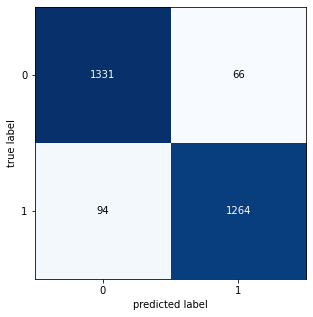

In [ ]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()